# The Grad Shafranov Equation

Recall the plasma force balance that is used to describe z-pinch and theta-pinch equilbria:
\begin{equation}
\nabla p = \vec{J}\times\vec{B}
\end{equation}
When this equation is satisfied, the forces experienced by a particle due to collisions with other particles (the left-hand side of the equation) is balanced with the electromagnetic forces on the plasma due to currents and magnetic fields (the right-hand side of the equation). A plasma whose pressure ($p$), current density ($\vec{J}$), and magnetic field ($\vec{B}$) satisfy this equation is said to be in *equilibrium*.

When we talked about z-pinches and theta-pinches, we set $\vec{J}$ to be in some direction ($\vec{z}$ for z-pinches, $\vec{\theta}$ for theta-pinches), and solve for the magnetic field and pressure. If we assume toroidal symmetry, that is, all quantities are constant in the $\vec{\theta}$-direction, we can solve the force balance equation to find an expression for equilibrium in a toroidal system. (Remember that tori are beneficial for confining plasma because of the hedgehog theorem). This equilibirum solution is called the "Grad Shafranov equation" (named after the people who worked it out):
\begin{equation}
R\frac{\partial}{\partial R}\left(\frac{1}{R}\frac{\partial\Psi}{\partial R}\right) + \frac{\partial^2\Psi}{\partial Z^2} = -\mu_0R^2\frac{\partial p}{\partial\Psi} - RB_{\theta}\frac{\partial(RB_{\theta})}{\partial\Psi}
\end{equation}

Here, we have added the variable $\Psi$ for convenience. we define $\Psi$ such that its gradient is perpendicular to the magnetic field ($\vec{B}$). This means that particles will tend to stay on surfaces that have the same $\Psi$ value. Becuase we're concerned about how well plasma stays in tokamaks (and other devices confining toroidal plasmas), plots showing surfaces of constant $\Psi$ can be used to understand how well plasma is confined in a given device.

In this notebook, we'll look at solutions to the Grad Shafranov equation and how to interpret them.

One solution to the Grad Shafranov equation is:
\begin{equation}
\Psi = -\mu_0\frac{\partial p}{\partial \Psi}R^4/8 - \frac{\partial(RB_{\theta})^2}{\partial\Psi}Z^2/4
\end{equation}

Advanced question: Can you show this?

Let's plot this expression for $\Psi$ in the R-Z plane and see what it looks like.

For convenience, we will set:
\begin{equation}
c_1 = \frac{\partial p}{\partial \Psi}
\end{equation}
\begin{equation}
c_2 = \frac{1}{2}\frac{\partial (RB_{\theta})^2}{\partial Z}
\end{equation}

In [1]:
# Imports the necessary tools we need
import numpy as np
import matplotlib.pyplot as plt
import IPython
%matplotlib widget

In [2]:
# Defines the domain
R = np.linspace(0, 2, 100)
Z = np.linspace(-1, 1, 100)
R, Z = np.meshgrid(R, Z)

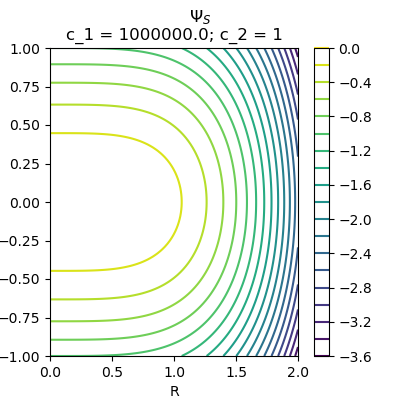

In [3]:
# mu0 is a constant of nature
mu0 = 4 * np.pi * 10**-7

# Note c1 and c2 are defined above; here we test out some values
c_1 = 1e6
c_2 = 1

# This is the expression for Psi mentioed above
PsiS = ((R**4) * -mu0 * c_1 / 8) - (c_2 * Z**2)

# Let's plot Psi
f1 = plt.figure(figsize=(4,4), dpi=100)
f1.suptitle('$\Psi_S$')
ax = f1.add_subplot(111)
ax.set_title(f'c_1 = {c_1}; c_2 = {c_2}')
c = ax.contour(R, Z, PsiS, 20)
plt.colorbar(c)
ax.set_xlabel('R')
ax.set_ylabel('Z')
plt.show()

Try a few different values for $c_1$ and $c_2$ and see how $\Psi_S$ changes as a result.

Note that this $\Psi_S$ only describes the effect of the plasma. We also need to take into account the effects of the magnets that we put around the plasma. We will define their $Psi$ as:
\begin{equation}
\Psi_V = c_3R^2
\end{equation}

When add these two effects together ($\Psi_S + \Psi_V$), we can see the overall $\Psi$.

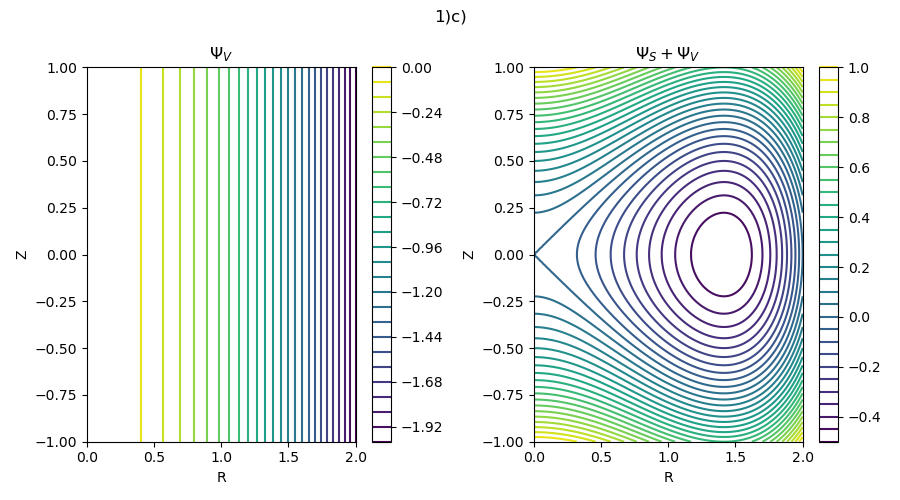

In [4]:
# Constant definitions
c_1 = -1/mu0
c_2 = -1
c_3 = -1/2

# Compute PsiV and PsiS
PsiV = c_3 * R**2
PsiS = ((R**4) * -mu0 * c_1 / 8) - (c_2 * Z**2)

# Plot PsiV and PsiV + PsiS
f2 = plt.figure(figsize=(9,5), dpi=100)
ax = f2.add_subplot(121)
c = ax.contour(R, Z, PsiV, 30)
plt.colorbar(c)
ax.set_xlabel('R')
ax.set_ylabel('Z')
ax.set_title('$\Psi_V$')
ax = f2.add_subplot(122)
c = ax.contour(R, Z, PsiS + PsiV, 30)
plt.colorbar(c)
ax.set_title('$\Psi_S + \Psi_V$')
ax.set_xlabel('R')
ax.set_ylabel('Z')
plt.tight_layout()
plt.show()

Notice that whereas before, the flux surfaces were 'open', we now have 'closed' flux surfaces (the darker contours), meaning that plasma will stay confined in this region, just as we want!

Now let's see how adding more magnetic field coils changes the shape of the flux surfaces, allowing us to make different shaped tokamaks.

The R0s vector defines the R-coordinates of the coils. The Z0s vector defines the Z-coordinates of the coils. The cs vector defines how much current is run through each coil, which determines how strong its magnetic field is. Red x's in the plot indicate where coils are placed

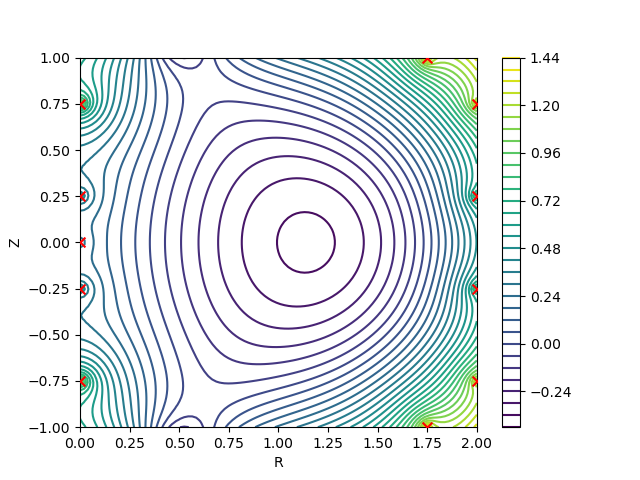

In [18]:
# Q1e
R0s = [    0,    0,     0,    0,     0,  1.75,   1.75,   2.0,   2.0,   2.0,   2.0,   0.5,  0.5] 
Z0s = [    0, 0.75, -0.75, 0.25, -0.25,   1.0,   -1.0,  0.25, -0.25,  0.75, -0.75, -1.15, 1.15]
cs =  [-0.05, -0.2,  -0.2, -0.1,  -0.1, -0.15,  -0.15, -0.10, -0.10, -0.10, -0.10,   0.5,  0.5] 

Psi = np.sum(np.dstack([PsiS, PsiV] + [c * 0.5 * np.log((R - R0)**2 + (Z - Z0)**2) for c, R0, Z0 in zip(cs, R0s, Z0s)]), axis=-1)

f1 = plt.figure()
ax = f1.add_subplot(111)
c = ax.contour(R, Z, Psi, 30)
xlims = ax.get_xlim()
ylims = ax.get_ylim()
ax.scatter(R0s, Z0s, c='r', marker='x', s=50, zorder=5)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
plt.colorbar(c)
ax.set_xlabel('R')
ax.set_ylabel('Z')

plt.show()